In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**CHECKING FOR MISSING VALUES**

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Exploratory data analysis**

In [6]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

1. The given data is of winequality-red,which has 1599 of 2 different categories with 12 of its attributes i.e fixed      acidity,volatile acidity, citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphate,alchohol,quality.
2. Most of the columns is continuous in nature except quality which is discrete continuos.
3. By observing the descriptive statistics of the data,we can say that fixed acidity and total sulfur dioxide column has little variance in it, and rest every other column is almost normally distributed.
4. Also,Meadian i.e 38.00 is less than mean 46.46 we can say that total sulfur dioxide is right side skewwd.
5. Volatile acidity & citric acid are the most useful attributes to identify quality of wine.


In [7]:
df.shape

(1599, 12)

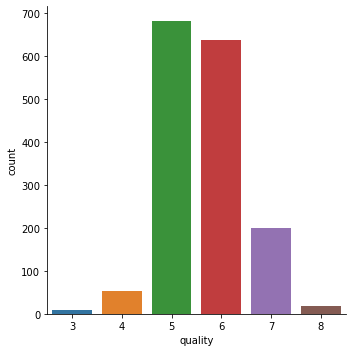

In [8]:
# Number of values for each quality

sns.catplot(x="quality", data = df, kind = "count")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

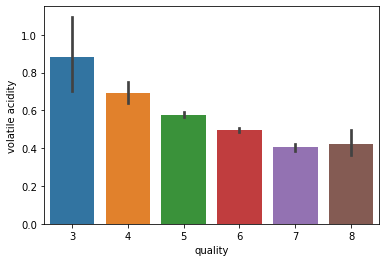

In [9]:
# Volatile acidity vs Quality

sns.barplot(x="quality", y="volatile acidity", data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

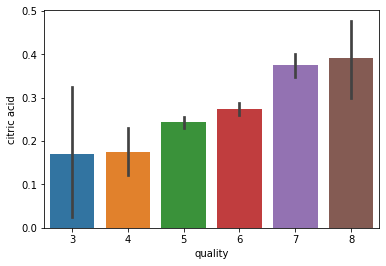

In [10]:
# citric acid vs quality

sns.barplot(x = "quality", y = "citric acid", data = df)

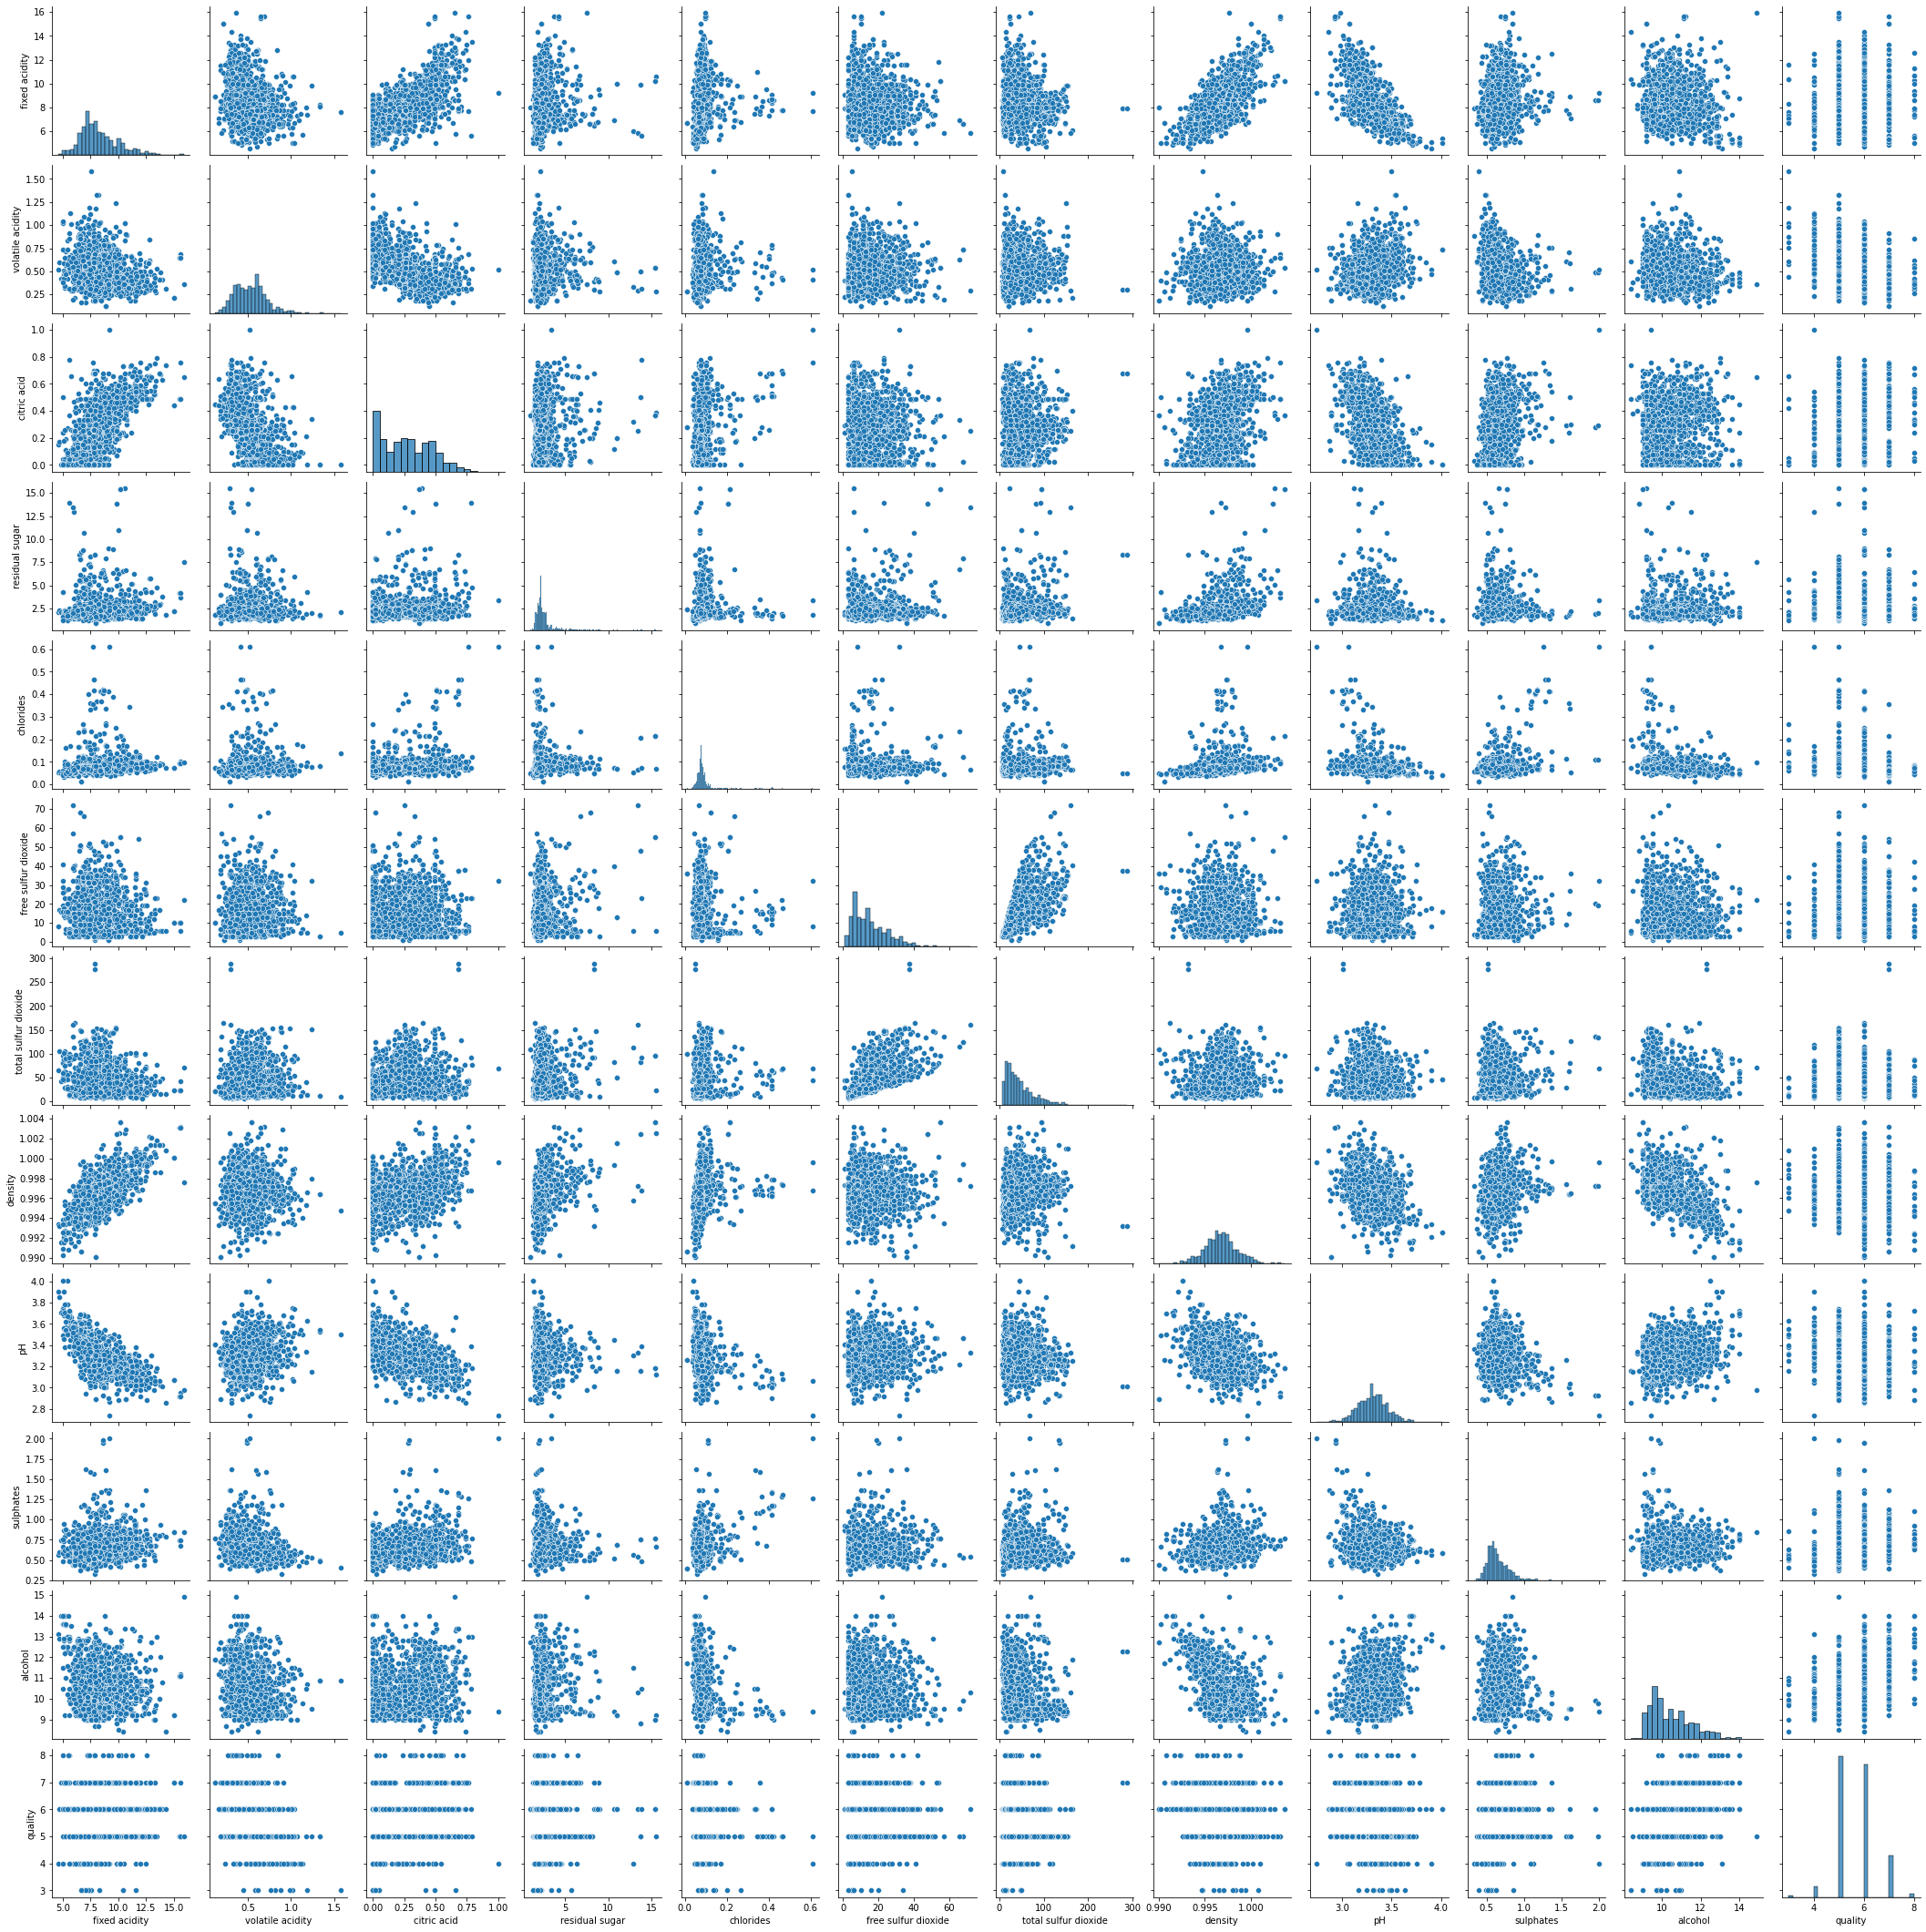

In [11]:
sns.pairplot(df)

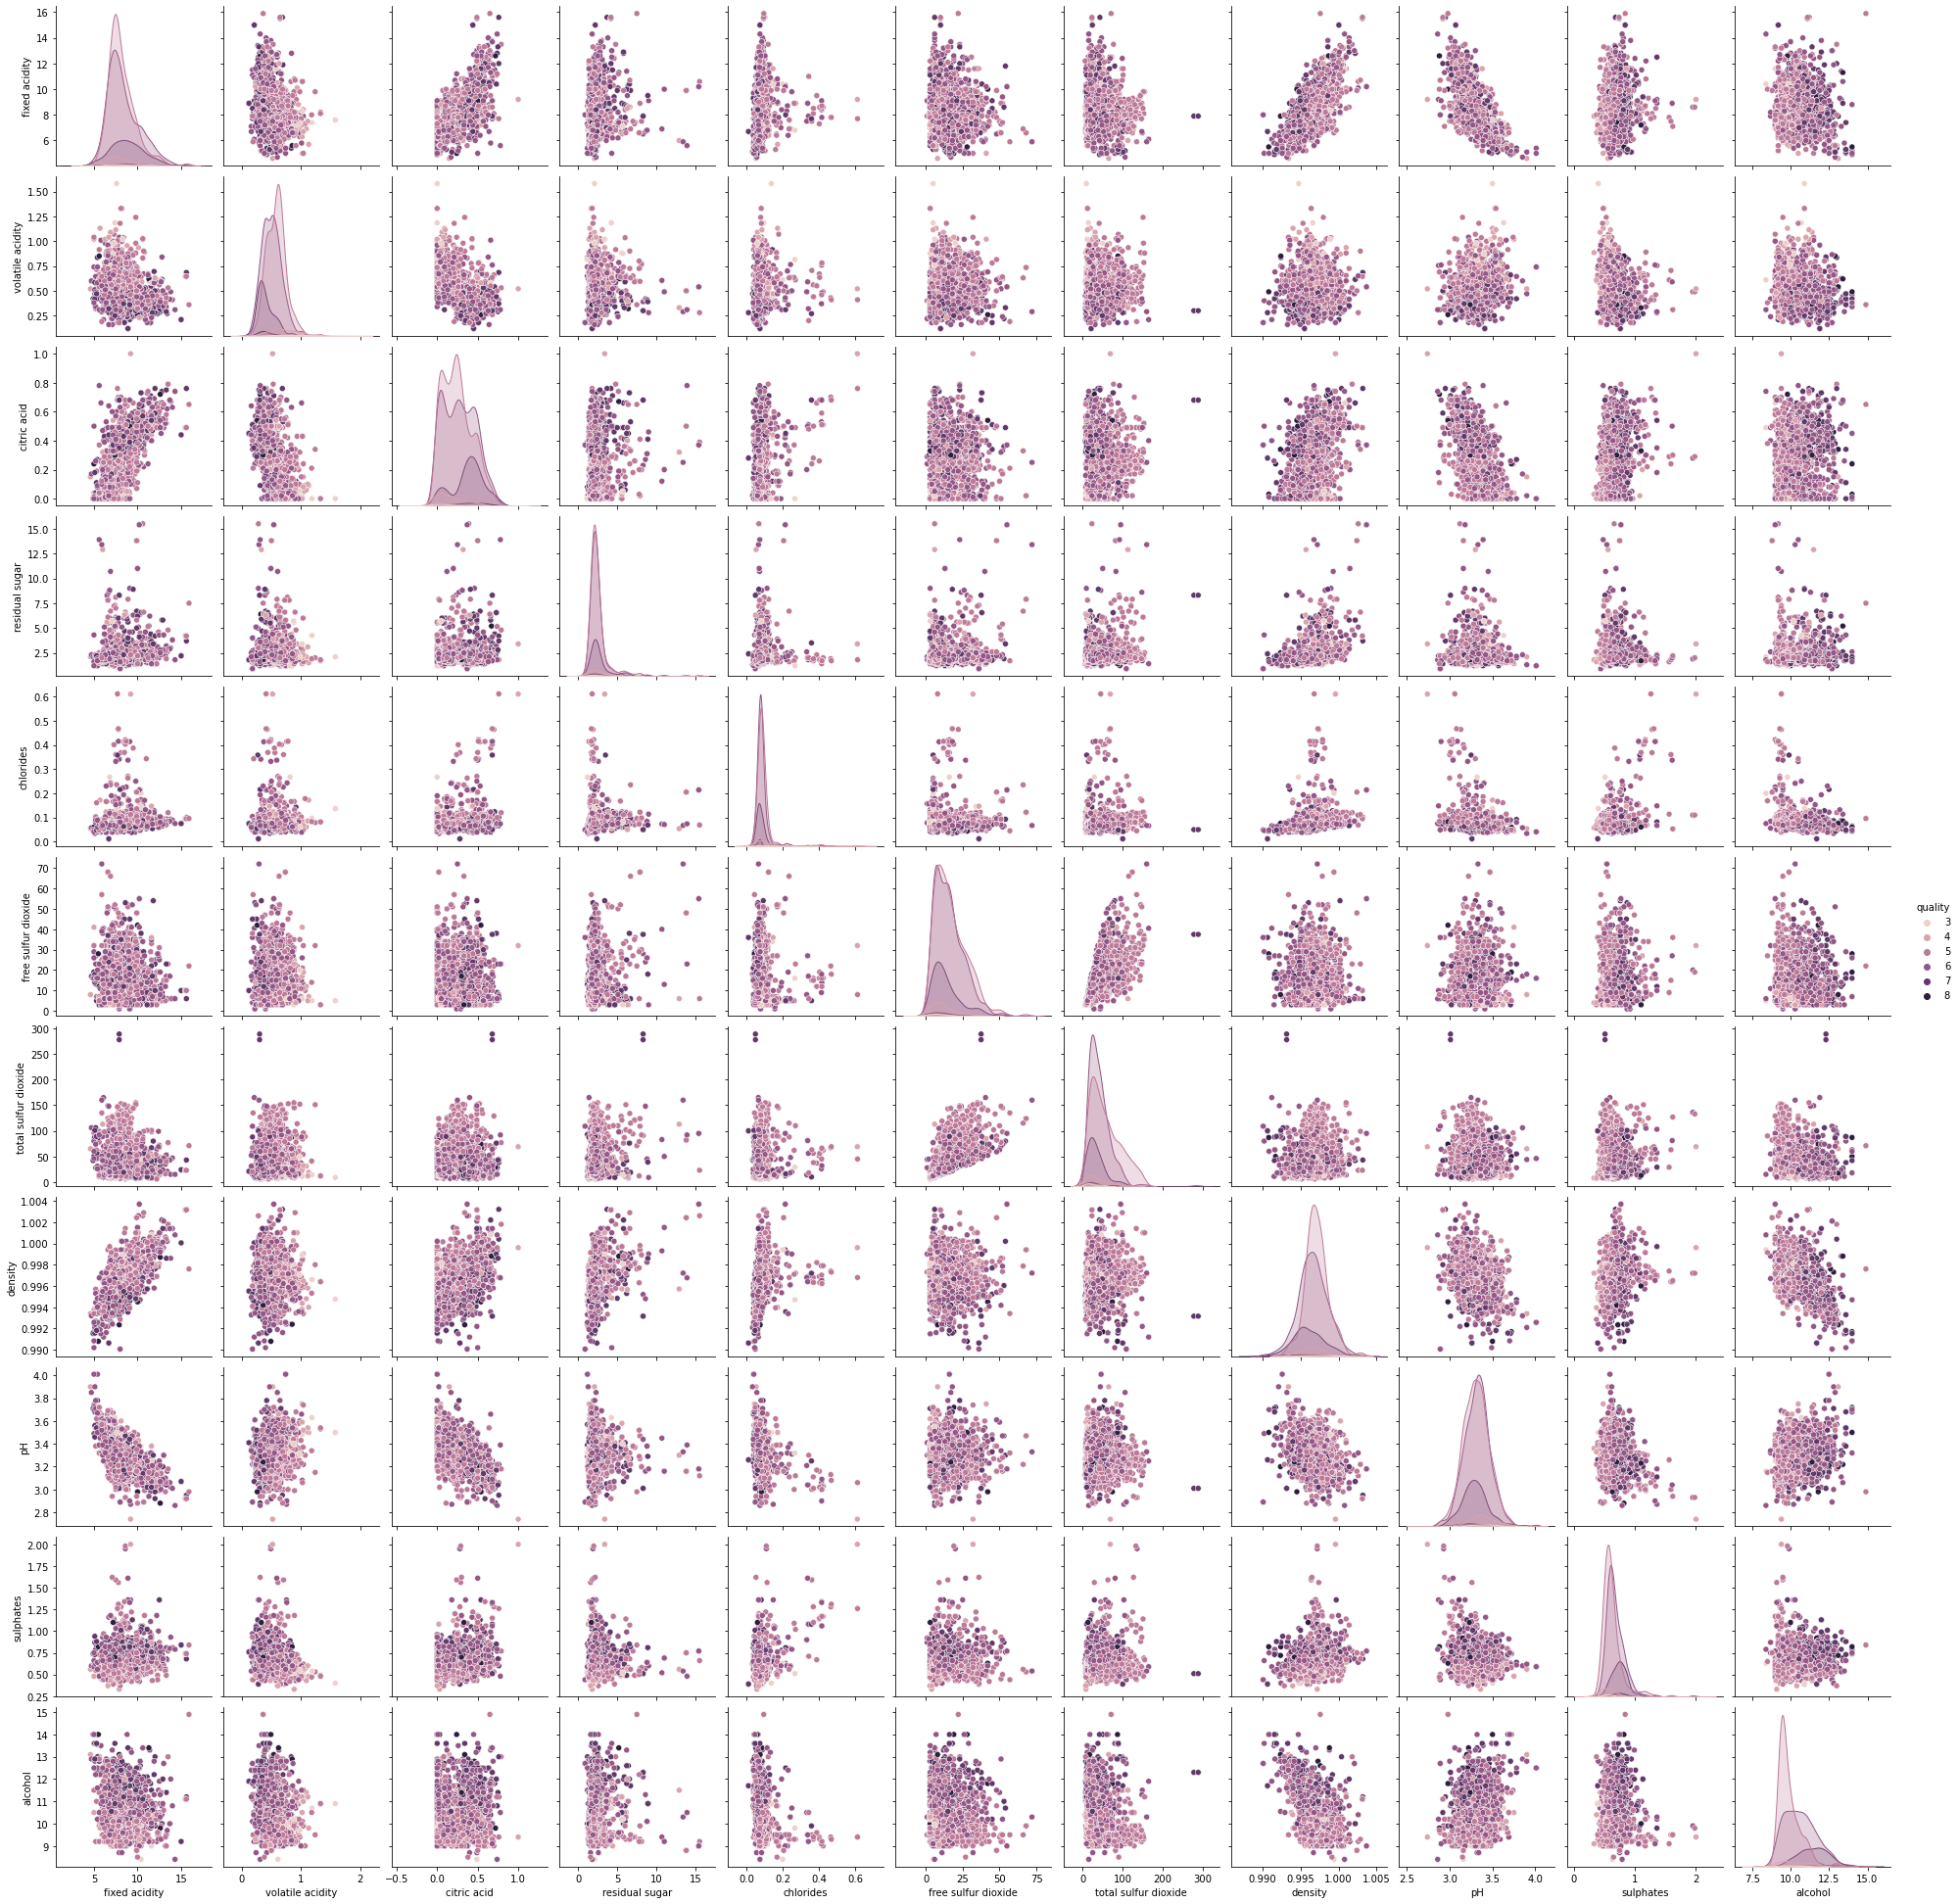

In [12]:
sns.pairplot(data=df,hue="quality")

<AxesSubplot:>

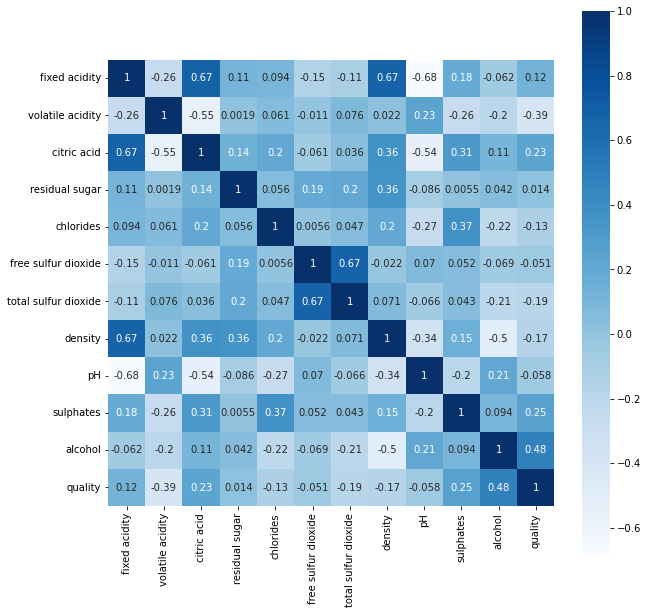

In [13]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))            
sns.heatmap(df.corr(), cbar=True, square=True, annot=True, cmap="Blues")


**SPLIT THE DATA**

In [15]:
x = df.drop('quality', axis=1)
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [16]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [18]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state=2, stratify=y)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrains = sc.fit_transform(xtrain)
xtests = sc.transform(xtest)

In [21]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    return model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


In [23]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.9069585613760751
Testing Accuracy : 0.884375


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       277
           1       0.61      0.40      0.48        43

    accuracy                           0.88       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



In [24]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.8811571540265832
Testing Accuracy : 0.890625


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.72      0.30      0.43        43

    accuracy                           0.89       320
   macro avg       0.81      0.64      0.68       320
weighted avg       0.88      0.89      0.87       320



In [25]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.878125


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       277
           1       0.54      0.70      0.61        43

    accuracy                           0.88       320
   macro avg       0.74      0.80      0.77       320
weighted avg       0.89      0.88      0.88       320



In [26]:
parameters = {
    "criterion": ["gini" , "entropy"],
    "max_depth": list(range(1, 20)),
    "min_samples_leaf": list(range(1, 20))
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END criterio

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=en

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=14; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=19; total time=   0.0s
[CV] END criteri

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [28]:
grid.best_score_

0.8881832107843138

In [29]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6)

In [30]:
dt = mymodel(grid.best_estimator_)

Training Accuracy : 0.9468334636434714
Testing Accuracy : 0.871875


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       277
           1       0.52      0.53      0.53        43

    accuracy                           0.87       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.87      0.87      0.87       320



In [31]:
gnb = mymodel(GaussianNB())

Training Accuracy : 0.8491008600469117
Testing Accuracy : 0.865625


              precision    recall  f1-score   support

           0       0.97      0.87      0.92       277
           1       0.50      0.81      0.62        43

    accuracy                           0.87       320
   macro avg       0.73      0.84      0.77       320
weighted avg       0.91      0.87      0.88       320



In [32]:
rf =mymodel(RandomForestClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.94375


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.84      0.72      0.77        43

    accuracy                           0.94       320
   macro avg       0.90      0.85      0.87       320
weighted avg       0.94      0.94      0.94       320



In [33]:
#Cross validation

In [34]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(logreg, x,y, cv=5, scoring="accuracy")
cvs

array([0.871875  , 0.8625    , 0.896875  , 0.846875  , 0.87147335])

In [35]:
cvs.mean()

0.8699196708463951

In [36]:
print(f"Avg Accuracy : {cvs.mean():.2f}\nSTD : {cvs.std():.2f}")

Avg Accuracy : 0.87
STD : 0.02
